In [97]:
import networkx
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import bs4
from bs4 import BeautifulSoup
import os
%matplotlib inline

In [92]:
def get_events_from_soup(soup):
    events = pd.DataFrame(columns=['message_id', 'from_name', 'type', 'datetime', 'to_id'])
    messages = soup.find_all('div', class_='message')
    
    last_from_name = None
    for msg in messages:
        if 'service' in msg['class']:
            continue            
        row = {
            'message_id': msg['id'],
        }
        from_name = msg.find('div', class_='from_name')
        if not from_name:
            from_name = last_from_name
        else:
            from_name = from_name.text.strip()
            last_from_name = from_name
        row['from_name'] = from_name
        row['datetime'] = msg.find('div', class_='date')['title']
        event_type = None
        reply_data = msg.find('div', class_='reply_to')
        if reply_data:
            row['type'] = 'reply'
            row['to_id'] = reply_data.find('a')['href'].replace('#go_to_', '')
        else:
            row['type'] = 'message'
            row['to_id'] = None
        events.loc[len(events)] = row 
    return events

target_file = 'chat_export/messages.html'
soup = None
with open(target_file) as f:
    soup = BeautifulSoup(f, 'html.parser')

events = get_events_from_soup(soup)

In [104]:
def get_events_from_file(fname):
    with open(fname) as f:
        soup = BeautifulSoup(f, 'html.parser')
        return get_events_from_soup(soup)

event_dfs = []
for fname in os.listdir('chat_export'):
    if 'messages' in fname and fname.endswith('.html'):
        event_dfs.append(get_events_from_file(os.path.join('chat_export', fname)))
        print('tick')

tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick
tick


In [105]:
events = pd.concat(event_dfs)

In [107]:
events

,message_id,from_name,type,datetime,to_id
0,message165017,Dmitry Abramov,message,17.01.2019 17:53:35,None
1,message165018,𝖁𝖊𝖈𝖍𝖊,message,17.01.2019 17:53:59,None
2,message165019,Dmitry Abramov,message,17.01.2019 17:54:17,None
3,message165020,𝖁𝖊𝖈𝖍𝖊,message,17.01.2019 17:54:31,None
4,message165021,Dmitry Abramov,message,17.01.2019 17:54:37,None
5,message165022,Dmitry Abramov,message,17.01.2019 17:54:38,None
6,message165023,Dmitry Abramov,message,17.01.2019 17:54:39,None
7,message165024,Dmitry Abramov,message,17.01.2019 17:54:40,None
8,message165025,Dmitry Abramov,message,17.01.2019 17:54:40,None
9,message165026,Dmitry Abramov,message,17.01.2019 17:54:41,None


In [148]:
#rare_names = events.from_name[events.from_name in events.from_name.value_counts()]
rare_names = np.array(events.from_name.value_counts()[events.from_name.value_counts() < 3].index)
events = events[~events.from_name.isin(rare_names)]
events

,message_id,from_name,type,datetime,to_id
0,message165017,Dmitry Abramov,message,17.01.2019 17:53:35,None
1,message165018,𝖁𝖊𝖈𝖍𝖊,message,17.01.2019 17:53:59,None
2,message165019,Dmitry Abramov,message,17.01.2019 17:54:17,None
3,message165020,𝖁𝖊𝖈𝖍𝖊,message,17.01.2019 17:54:31,None
4,message165021,Dmitry Abramov,message,17.01.2019 17:54:37,None
5,message165022,Dmitry Abramov,message,17.01.2019 17:54:38,None
6,message165023,Dmitry Abramov,message,17.01.2019 17:54:39,None
7,message165024,Dmitry Abramov,message,17.01.2019 17:54:40,None
8,message165025,Dmitry Abramov,message,17.01.2019 17:54:40,None
9,message165026,Dmitry Abramov,message,17.01.2019 17:54:41,None


In [143]:
merged = pd.merge(events, events, left_on='to_id', right_on='message_id')

to_rename = {
    'message_id_x': 'message_id',
    'from_name_x': 'from_name',
    'type_x': 'type',
    'datetime_x': 'datetime',
    'to_id_x': 'to_id',
    'from_name_y': 'to_name',
}

merged = merged.rename(to_rename, axis=1)[to_rename.values()]
merged

,datetime,from_name,to_name,message_id,type,to_id
0,17.01.2019 18:17:24,𝖁𝖊𝖈𝖍𝖊,Фан Слкдствие,message165038,reply,message165036
1,17.01.2019 22:54:13,Dmitry Abramov,червяшка,message165052,reply,message165041
2,17.01.2019 22:54:31,Dmitry Abramov,André Bellyanné,message165053,reply,message165046
3,17.01.2019 23:12:58,𝖁𝖊𝖈𝖍𝖊,Dmitry Abramov,message165055,reply,message165053
4,17.01.2019 23:21:54,Иван Хлорбензол,𝖁𝖊𝖈𝖍𝖊,message165058,reply,message165056
5,17.01.2019 23:24:59,𝖁𝖊𝖈𝖍𝖊,Иван Хлорбензол,message165059,reply,message165058
6,17.01.2019 23:25:12,Иван Хлорбензол,𝖁𝖊𝖈𝖍𝖊,message165060,reply,message165059
7,17.01.2019 23:25:47,Иван Хлорбензол,настенька,message165063,reply,message165062
8,17.01.2019 23:29:48,Капралова НастяЦ,настенька,message165076,reply,message165062
9,17.01.2019 23:28:11,aртес салтыков,Иван Хлорбензол,message165069,reply,message165064


In [149]:
rare_names = np.array(merged.to_name.value_counts()[merged.to_name.value_counts() < 3].index)
merged = merged[~merged.to_name.isin(rare_names)]
merged

,datetime,from_name,to_name,message_id,type,to_id
0,17.01.2019 18:17:24,𝖁𝖊𝖈𝖍𝖊,Фан Слкдствие,message165038,reply,message165036
1,17.01.2019 22:54:13,Dmitry Abramov,червяшка,message165052,reply,message165041
2,17.01.2019 22:54:31,Dmitry Abramov,André Bellyanné,message165053,reply,message165046
3,17.01.2019 23:12:58,𝖁𝖊𝖈𝖍𝖊,Dmitry Abramov,message165055,reply,message165053
4,17.01.2019 23:21:54,Иван Хлорбензол,𝖁𝖊𝖈𝖍𝖊,message165058,reply,message165056
5,17.01.2019 23:24:59,𝖁𝖊𝖈𝖍𝖊,Иван Хлорбензол,message165059,reply,message165058
6,17.01.2019 23:25:12,Иван Хлорбензол,𝖁𝖊𝖈𝖍𝖊,message165060,reply,message165059
7,17.01.2019 23:25:47,Иван Хлорбензол,настенька,message165063,reply,message165062
8,17.01.2019 23:29:48,Капралова НастяЦ,настенька,message165076,reply,message165062
9,17.01.2019 23:28:11,aртес салтыков,Иван Хлорбензол,message165069,reply,message165064


In [161]:
merged.from_name = merged.from_name.apply(lambda x: x.split(' via')[0])
merged.to_name = merged.to_name.apply(lambda x: x.split(' via')[0])

In [162]:
merged.to_csv('spb_flood_replies.csv', encoding='utf-8')

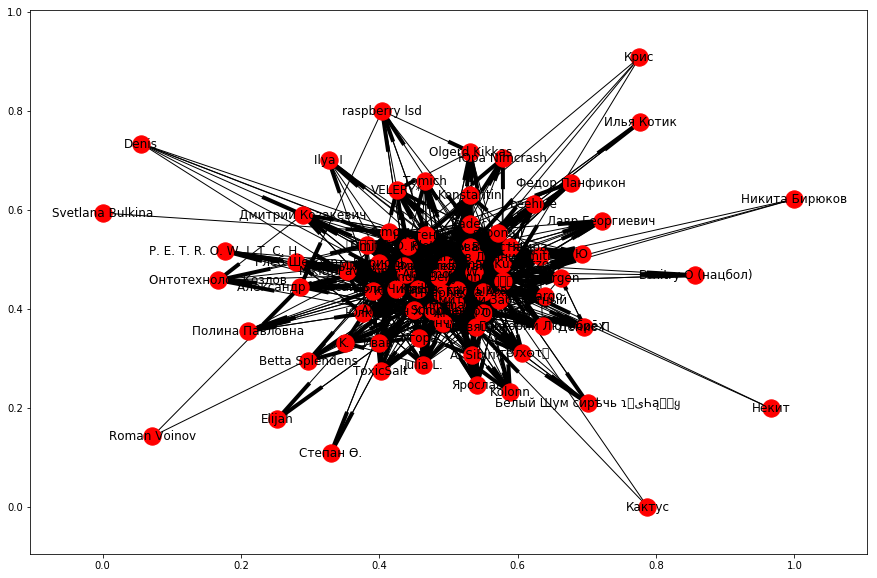

In [163]:
nodes = merged.from_name.unique()
edges = merged[['from_name', 'to_name']].values

graph = nx.DiGraph()
graph.add_edges_from(edges)
plt.figure(figsize=(15, 10))
nx.draw_networkx(graph)
plt.show()

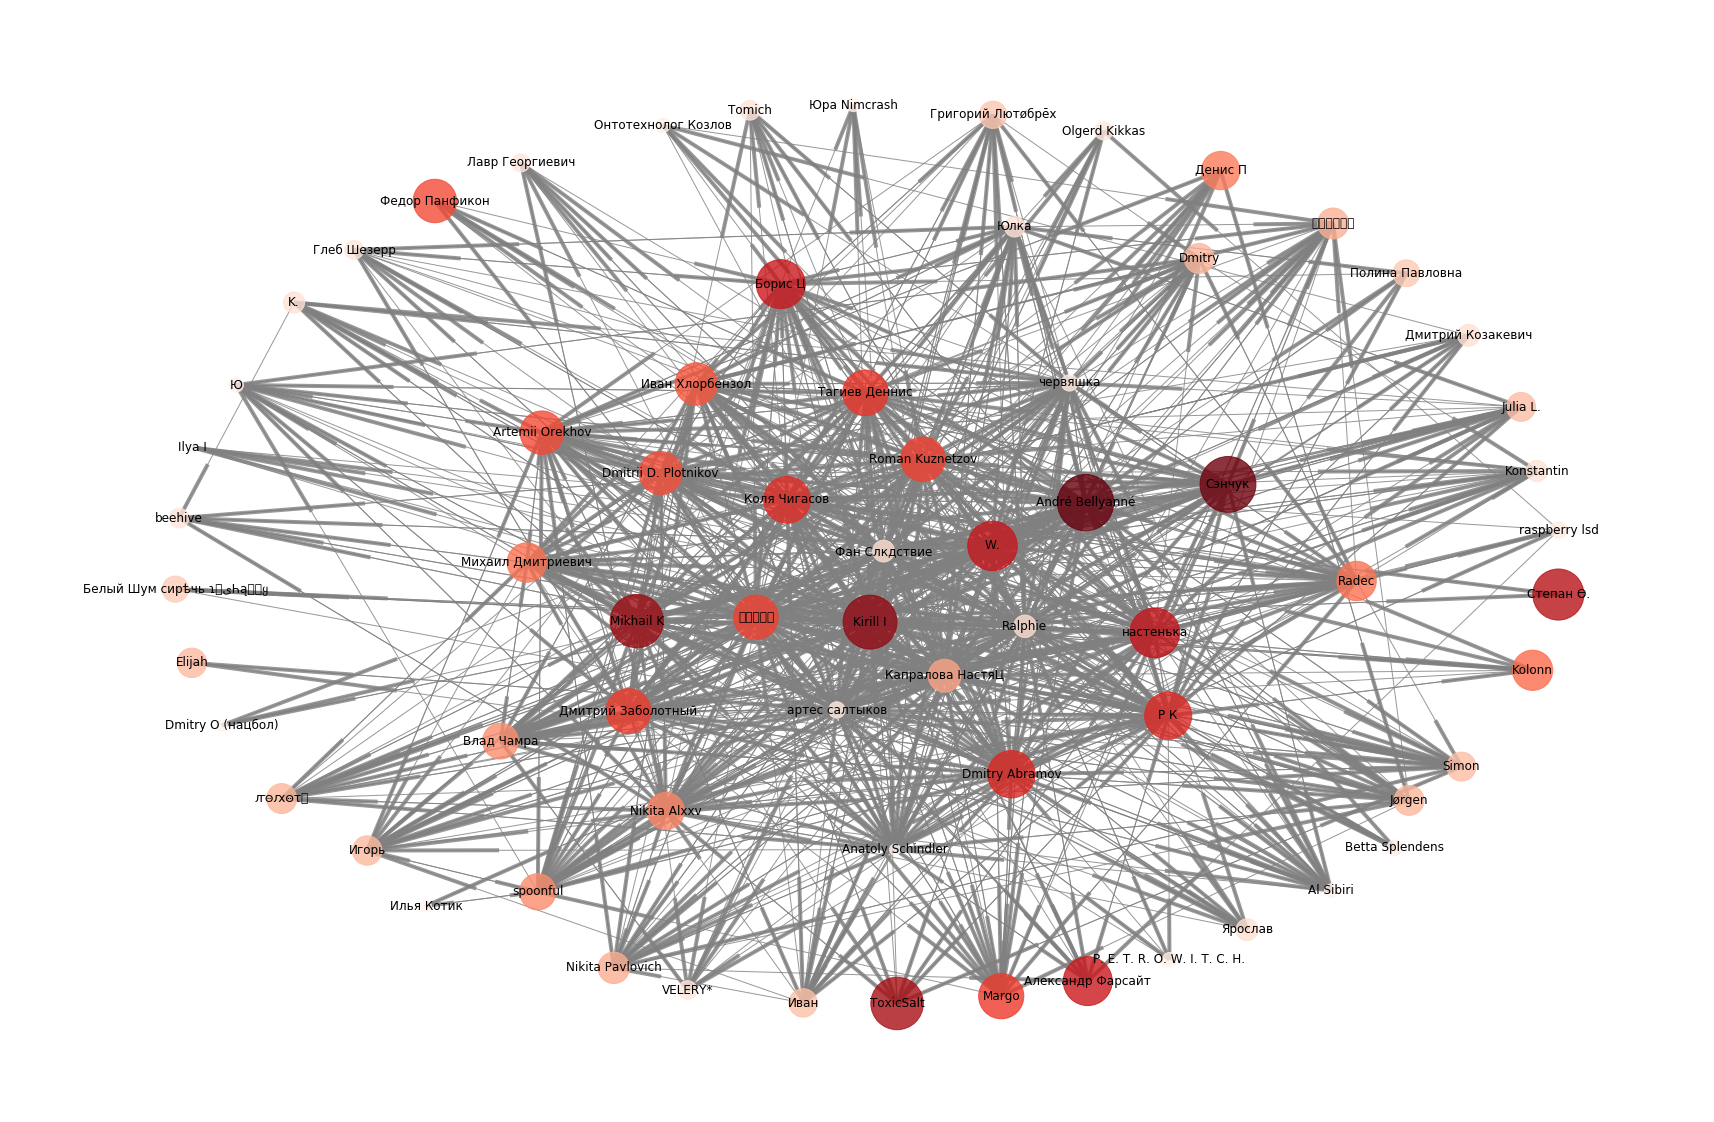

In [164]:
degree = graph.in_degree()# nx.degree(graph)


filtered_nodes = [k for k, v in degree.items() if v > 1]
subgraph = nx.subgraph(graph, filtered_nodes)

degree = nx.degree(subgraph)
labels = nx.get_node_attributes(subgraph, 'full_name')

plt.figure(1, figsize=(30,20))
plt.axis('off')
pos = nx.spring_layout(subgraph, k=3/np.sqrt(subgraph.order()))
nx.draw_networkx(subgraph,
                 pos=pos,
                 node_size = [d*30 for k, d in degree.items()],
                 node_color=degree.values(),
                 font_size=12,
                 cmap=plt.cm.Reds,
                 with_labels=True,
                 #labels=labels,
                 edge_color='grey',
                 alpha=0.8)
plt.show()

In [23]:
# # from json
# import json
# data = None
# with open('tgexport.json') as f:
#     data = json.loads(f.read())

In [22]:
#[c['type'] for c in data['chats']['list']]